In [16]:
import torch as t
import numpy as np

# Tensor
* 高维数组：可是一个数、一维数组、二维数组或者更高维数组  
* 和numpy中的ndarrays类似，但是Tensor可以使用GPU加速

创建5*3矩阵，只是分配了空间，并没有初始化

In [2]:
x = t.Tensor(5, 3)
x

tensor([[1.0837e-38, 9.9184e-39, 1.0286e-38],
        [1.0286e-38, 1.0653e-38, 1.0194e-38],
        [8.4490e-39, 1.0102e-38, 9.0919e-39],
        [1.0102e-38, 8.9082e-39, 8.4489e-39],
        [9.6429e-39, 8.4490e-39, 9.6429e-39]])

使用[0, 1]均匀分布随机初始化二维数组

In [3]:
x = t.rand(5, 3)
x

tensor([[0.5164, 0.2417, 0.8922],
        [0.8177, 0.8518, 0.3945],
        [0.1616, 0.8271, 0.8416],
        [0.3745, 0.3961, 0.9681],
        [0.0538, 0.5142, 0.6247]])

查看x的形状  
torch.Size是tuple对象的子类，支持tuple的所有操作

In [8]:
print(x.size())
x.size()[0], x.size()[1]

torch.Size([5, 3])


(5, 3)

加法第一种写法

In [9]:
y = t.rand(5, 3)
x + y

tensor([[1.4043, 0.7368, 0.9142],
        [1.4096, 0.9056, 1.3170],
        [1.1499, 1.3409, 1.2188],
        [1.0870, 1.0755, 1.5208],
        [0.5797, 1.0982, 1.5089]])

加法第二种写法

In [10]:
t.add(x, y)

tensor([[1.4043, 0.7368, 0.9142],
        [1.4096, 0.9056, 1.3170],
        [1.1499, 1.3409, 1.2188],
        [1.0870, 1.0755, 1.5208],
        [0.5797, 1.0982, 1.5089]])

加法第三种写法

In [11]:
result = t.Tensor(5, 3) # 预先分配空间
t.add(x, y, out=result) # 输入到result中
result

tensor([[1.4043, 0.7368, 0.9142],
        [1.4096, 0.9056, 1.3170],
        [1.1499, 1.3409, 1.2188],
        [1.0870, 1.0755, 1.5208],
        [0.5797, 1.0982, 1.5089]])

加法第四种写法，带替换的加法

In [12]:
print("最初y")
print(y)

print("不替换加法，y的结果是")
y.add(x)
print(y)

print("替换加法，y的结果是")
y.add_(x)
print(y)

最初y
tensor([[0.8880, 0.4951, 0.0220],
        [0.5920, 0.0538, 0.9224],
        [0.9883, 0.5138, 0.3772],
        [0.7125, 0.6794, 0.5527],
        [0.5259, 0.5840, 0.8842]])
不替换加法，y的结果是
tensor([[0.8880, 0.4951, 0.0220],
        [0.5920, 0.0538, 0.9224],
        [0.9883, 0.5138, 0.3772],
        [0.7125, 0.6794, 0.5527],
        [0.5259, 0.5840, 0.8842]])
替换加法，y的结果是
tensor([[1.4043, 0.7368, 0.9142],
        [1.4096, 0.9056, 1.3170],
        [1.1499, 1.3409, 1.2188],
        [1.0870, 1.0755, 1.5208],
        [0.5797, 1.0982, 1.5089]])


Tensor的选取操作和numpy类似

In [13]:
x[:, 1]

tensor([0.2417, 0.8518, 0.8271, 0.3961, 0.5142])

Tensor和numpy的相互转化

In [14]:
a = t.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [15]:
b = a.numpy() # Tensor->numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [17]:
a = np.ones(5)
b = t.from_numpy(a) # numpy->Tensor
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


查询gpu是否可以用

In [18]:
t.cuda.is_available()

True

# Autograd: 自动微分
* 实现自动求导数，避免手动计算导数的复杂过程。
* autograd.Variable是Autuograd核心类，它封装了Tensor并支持几乎所有Tensor的操作。通过调用.backward实现反向传播，自动计算所有梯度。
* autograd.Variable的数据结构：data(保存的Tensor)、grad(当前data对应的梯度,也是autograd.Variable类型)、grad_fn(指向Function对象，用于反向传播的梯度计算之用)

In [19]:
from torch.autograd import Variable

使用Tensor新建一个Variable

In [21]:
x = Variable(t.ones(2, 2), requires_grad = True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [22]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [23]:
y.grad_fn

In [24]:
y.backward() # 反向传播计算梯度

In [25]:
# y = x.sum() = x[0][0]+x[0][1]+x[1][0]+x[1][1]
# 经过求导，每个值的梯度都应该是0
x.grad

tensor([[1., 1.],
        [1., 1.]])

注意：grad在反向传播过程中是累加的（accumulated），这意味着每次运行反向传播梯度都会累加，所以反向传播前要将之前的梯度清0

In [26]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [27]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

划线结束的函数是inplace操作

In [28]:
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [29]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

Variable和Tensor有几乎一致的接口，实际使用时可以无缝切换

In [30]:
x = Variable(t.ones(4, 5))
y = t.cos(x)
x_tensor_cos = t.cos(x.data)
print(y)
print(x_tensor_cos)

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])
tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])


# 实战：实现一个神经网路
* torch.nn 是为神经网路设计的模块化接口。
* torch.nn.Module 是 nn中最重要的类，它是一个网络的封装，包含网络各层的定义以及forward方法。调用forward(data)，可返回前向传播的结果。

接下来，实现一个LeNet网络：
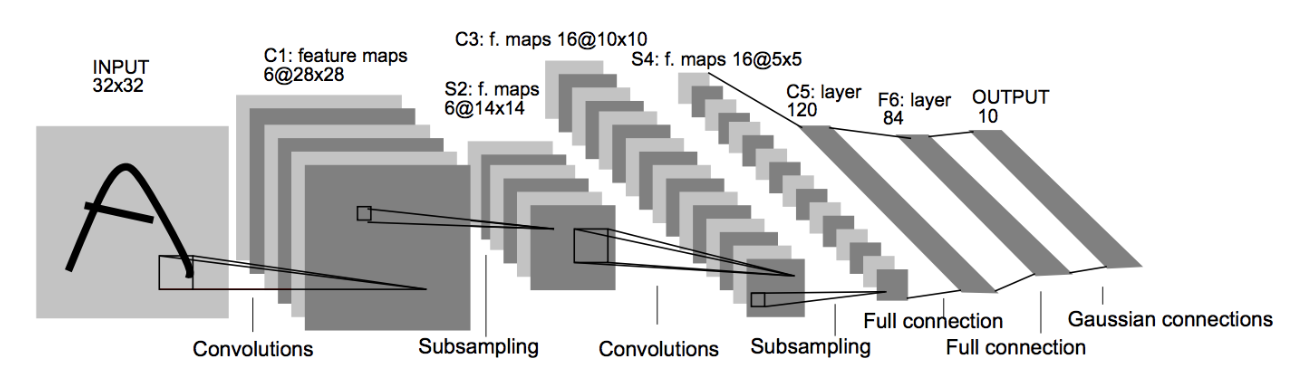

In [67]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(LeNet, self).__init__()
        # 卷积层'1'表示输入图片为单通道，'6'表示输出图片通道数
        # '5'表示卷积核5*5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层，y = Wx+b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 卷积->激活->池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape, '-1'表示自适应
        x = x.view(x.size()[0], -1) # x.size()[0]表示的是batch_size
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

leNet = LeNet()
print(leNet)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在nn.Module的子类中定义了forward函数，backword函数就会被自动实现（利用Autograd）。

网络的可学习参数可通过net.parameters()返回，net.named_parameters可同时返回可学习的参数和名称

In [39]:
params = list(leNet.parameters())
print(len(params))

10


In [40]:
for name, parameters in leNet.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward函数的输入和输出都是Variable，只有Variable才具有自动求导功能，Tensor是没有的，所以在输入时，需要把Tensor封装成Variable。

In [76]:
inp = Variable(t.randn(1, 1, 32, 32))
out = leNet(inp)
out.size()

torch.Size([1, 10])

In [77]:
leNet.zero_grad() # 所有参数的梯度清0
out.backward(Variable(t.ones(1, 10))) # 反向传播

注意：torch.nn只支持mini-batches,不支持一次只输入一个样本。如果想输入一个样本，使用input.unsqueeze(0)将batch_size设置为1。  
例如：nn.Conv2d输入必须是4维的，形如 nSamples*nChannels*Height*Width。可以将nSamples=1。

## 损失函数
nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [71]:
output = leNet(inp)
target = Variable(t.arange(0, 10)).float()
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(28.8019, grad_fn=<MseLossBackward>)

现在计算图转化为：  
input->conv2d->relu->maxpool2d->conv2d->relu->maxpool2d->view->linear->relu->linear->relu->linear->MSELoss->loss  

当调动loss.backward()时，该图会动态生成并自动微分，也会自动计算图中参数的导数。

In [72]:
leNet.zero_grad()
print("反向传播前conv1.bias的梯度")
print(leNet.conv1.bias.grad)
loss.backward()
print("反向传播后conv1.bias的梯度")
print(leNet.conv1.bias.grad)

反向传播前conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播后conv1.bias的梯度
tensor([-0.0496, -0.0140,  0.0044,  0.0969,  0.0738,  0.0953])


## 优化器
* 在反向传播计算完所有参数的梯度后，需要使用优化方法更新网络的权重和参数。例如，随机梯度下降法(SGD)：weight=weight-learning_rate*gradient

手动实现SGD

In [73]:
learning_rate = 0.01
for f in leNet.parameters():
    f.data.sub_(f.grad.data*learning_rate) # inplace减法

使用torch.optim中的优化器方法进行优化。

In [81]:
import torch.optim as optim

optimizer = optim.SGD(leNet.parameters(), lr=0.01)

# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad()

# 计算损失
output = leNet(inp)
loss = criterion(output, target)

# 反向传播
loss.backward()
# 更新参数
optimizer.step()

torchversion：数据加载和预处理十分复杂，torchversion提供了一些可极大简化和加快数据处理流程的工具。同时，对于常用数据集，pytorch提供了封装好的接口供用户快速调用，这些数据集主要保存在torchversion。  
总的来说，torchversion实现了常用的图像数据加载功能，例如Imagenet，CIFAR10，MINIST等，以及常用的数据转化操作，这极大地方便了数据加载。